## Init

In [1]:
import os

path = os.getcwd()
# set the working directory
os.chdir('c:\\Github\\new-peak-project\\src')
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\new-peak-project\src


In [2]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [3]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *
from models.Utils import *

import matplotlib.pyplot as plt
import seaborn as sns
import roadrunner
import numpy as np
import pandas as pd

# import scikit-learn
from sklearn.linear_model import LinearRegression
# tree models and support vector machines
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import pearson correlation
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from copy import deepcopy

### Notebook Parameters

In [4]:
import os

# parameters
notebook_name = 'test6'

# Generation of ground truth model

model_name = 'v3_small_model_52'
o_random_seed = 4
no_observable_species = 5
no_feedback_regulations = 2
specie_value_range = (5, 5000)
param_range = (0.1, 10)
param_multiplier_range = (0.7, 1.3)

# Simulation parameters

simulation_time = 500
simulation_step = 100

# Feature data generation

feature_generation_method = 'uniform'
feature_generation_extra_params = {'min': 0.1, 'max': 10}
feature_generation_size = 1000
feature_generation_seed = 50  # if -1 then 'o_random_seed' is used
if feature_generation_seed == -1:
    feature_generation_seed = o_random_seed


data_engineering_method = 'dynamic_feature'
''' 
Options: 
- 'last_time_point' : only the last time point of the phosphorylated species is used
- 'dynamic_feature': computes the characteristic 'ten' dynamic feature for each specie data 
'''

# General parameters
parallelise = True
save_figures = True
experiment_id = notebook_name + '_' + \
    str(o_random_seed) + '_' + str(feature_generation_seed)
experiment_folder = config['DATA_PATH'] + '/' + experiment_id + '/'
if not os.path.exists(experiment_folder):
    os.makedirs(experiment_folder)

print(experiment_folder)

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments/test6_4_50/


## Export to HDF5

In [5]:
from models.Solver.RoadrunnerSolver import RoadrunnerSolver

rr_solver = RoadrunnerSolver()

In [6]:
### Generate the ground truth model

model_spec = ModelSpecification()
model_spec.generate_specifications(o_random_seed, no_observable_species, no_feedback_regulations, verbose=0)
G0 = model_spec.generate_network(model_name, specie_value_range, param_range, param_multiplier_range, random_seed=o_random_seed, verbose=0)

states_variable_names = G0.get_state_variables().keys()

rr_solver.compile(G0.get_sbml_model())
result = rr_solver.simulate(0, simulation_time, simulation_step)
result

,time,A0p,A0,A1p,A1,A2p,A2,A3p,A3,A4p,...,Cp,B1p,B1,B2p,B2,B3p,B3,B4p,B4,C
0,0.000000,0.000000,3633.000000,0.000000,4715.000000,0.000000,4407.000000,0.000000,2559.000000,0.000000,...,0.000000,0.000000,4851.000000,0.000000,408.000000,0.000000,2270.000000,0.000000,3038.000000,100.000000
1,5.050505,247.283679,3385.716321,260.694719,4454.305281,257.434272,4149.565728,225.709001,2333.290999,4.966645,...,0.226776,318.800985,4532.199015,100.942995,307.057005,232.739030,2037.260970,31.458169,3006.541831,99.773224
2,10.101010,435.771134,3197.228866,461.755249,4253.244751,455.443812,3951.556188,393.929391,2165.070609,3.837347,...,0.304963,1050.588831,3800.411169,246.348341,161.651659,722.175989,1547.824011,53.064260,2984.935740,99.695037
3,15.151515,589.179524,3043.820476,627.713694,4087.286306,618.358640,3788.641360,527.166760,2031.833240,2.796790,...,0.367685,2064.443753,2786.556247,327.005116,80.994884,1301.265566,968.734434,66.201835,2971.798165,99.632315
4,20.202020,718.425265,2914.574735,769.689231,3945.310769,757.245860,3649.754140,636.087687,1922.912313,2.009957,...,0.422543,3210.371440,1640.628560,355.220481,52.779519,1789.230545,480.769455,73.862200,2964.137800,99.577457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,479.797980,1816.258211,1816.741789,2353.362541,2361.637459,2201.377192,2205.622808,1279.498416,1279.501584,0.172888,...,0.677839,4805.642683,45.357317,391.549137,16.450863,2198.741348,71.258652,78.932605,2959.067395,99.322161
96,484.848485,1816.279410,1816.720590,2353.619550,2361.380450,2201.521809,2205.478191,1279.498627,1279.501373,0.172888,...,0.677838,4805.647887,45.352113,391.550210,16.449790,2198.741361,71.258639,78.932605,2959.067395,99.322162
97,489.898990,1816.298765,1816.701235,2353.860636,2361.139364,2201.656608,2205.343392,1279.498811,1279.501189,0.172888,...,0.677838,4805.652768,45.347232,391.551209,16.448791,2198.741372,71.258628,78.932604,2959.067396,99.322162
98,494.949495,1816.316457,1816.683543,2354.086838,2360.913162,2201.782300,2205.217700,1279.498972,1279.501028,0.172888,...,0.677838,4805.657347,45.342653,391.552141,16.447859,2198.741382,71.258618,78.932604,2959.067396,99.322162


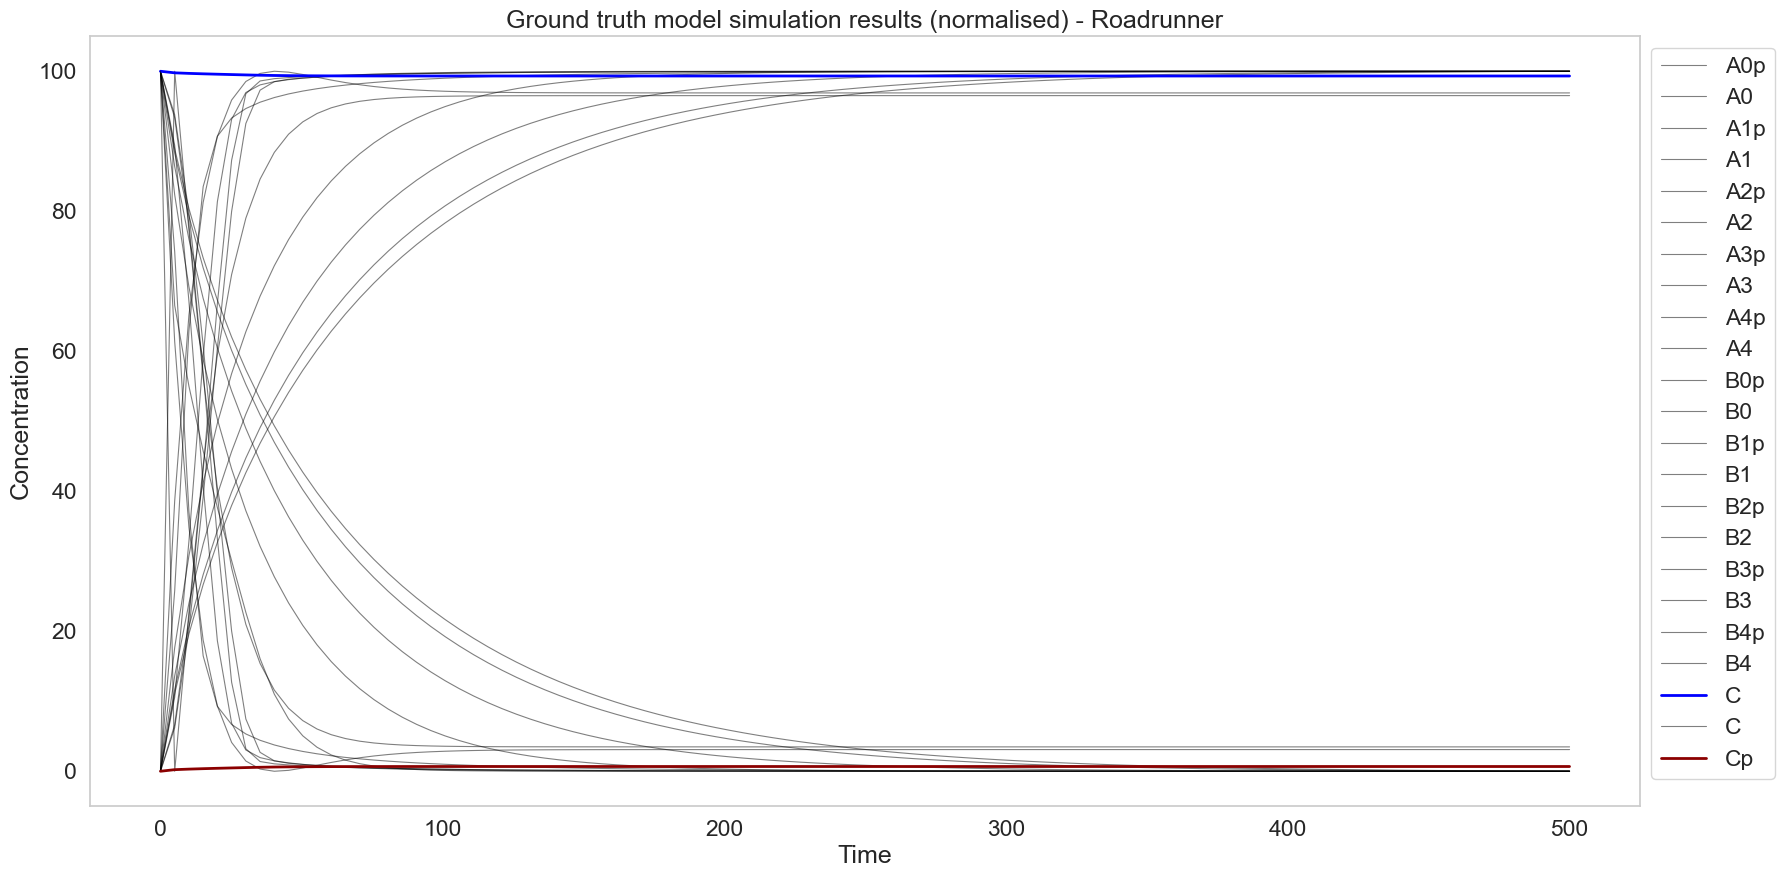

In [7]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Plot the simulation results
plt.figure(figsize=(20, 10))

for state in states_variable_names:
    if state == 'C':
        plt.plot(result['time'], result[state], label=state, c='blue', linewidth=2)
    if state == 'Cp':
        plt.plot(result['time'], result[state], label=state, c='darkred', linewidth=2)
    else:
        # first process result[state] to normalise between 0 to 100 
        # and then plot it
        result[state] = (result[state] - result[state].min()) / (result[state].max() - result[state].min()) * 100
        plt.plot(result['time'], result[state], label=state, c='black', linewidth=0.8, alpha=0.5)
plt.title('Ground truth model simulation results (normalised) - Roadrunner')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

In [8]:
hdf5_file = experiment_folder + 'result.h5'
result.to_hdf(hdf5_file, key='data', mode='w')